## 전처리된 파일 불러오기

In [1]:
import pandas as pd

In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("Y_train.csv")

In [3]:
X_train.shape, X_test.shape , y_train.shape

((891, 22), (418, 22), (891, 1))

## 앙상블 모델 사용하기
- 머신러닝에서 성능이 좋은 모델
- 여러개의 Decision Tree를 활용하는 모델

### randomForest 모델 사용

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
# 모델생성
forest_model = RandomForestClassifier()

In [9]:
import warnings
warnings.filterwarnings('ignore')

### 교차검증

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_model, X_train , y_train, cv =5).mean()

0.8024731655263324

### 학습

In [11]:
#모델학습
forest_model.fit(X_train, y_train)

RandomForestClassifier()

### 모델 평가

In [12]:
# 학습한 모델로 예측
pred = forest_model.predict(X_test)
# 평가결과 답안지에 예측한 값 넣기
sub = pd.read_csv("./data/titanic/gender_submission.csv")
sub['Survived'] = pred
# 예측한 값 내보내기

In [13]:
sub.to_csv("my_answer03.csv" , index= False)

### for 문을 통한 하이퍼 파라미터 튜닝

In [16]:
# 하이퍼 파라미터 튜닝
for i in range(50,81):
    forest_model =RandomForestClassifier(n_estimators=i)
    result = cross_val_score(forest_model, X_train, y_train, cv=5).mean()
    print(f'n_estimators: {i}, score : {result}')

n_estimators: 50, score : 0.8002385286548239
n_estimators: 51, score : 0.8080785889146946
n_estimators: 52, score : 0.8002259745150964
n_estimators: 53, score : 0.8024480572468772
n_estimators: 54, score : 0.8114744837110036
n_estimators: 55, score : 0.8002259745150964
n_estimators: 56, score : 0.8024543343167408
n_estimators: 57, score : 0.8024794425961961
n_estimators: 58, score : 0.8047203565375682
n_estimators: 59, score : 0.8024668884564685
n_estimators: 60, score : 0.8114556525014123
n_estimators: 61, score : 0.8047140794677045
n_estimators: 62, score : 0.8024731655263324
n_estimators: 63, score : 0.80585022911305
n_estimators: 64, score : 0.7957504237022158
n_estimators: 65, score : 0.8013495700207145
n_estimators: 66, score : 0.8080911430544221
n_estimators: 67, score : 0.8080911430544223
n_estimators: 68, score : 0.8103257799259307
n_estimators: 69, score : 0.8024794425961961
n_estimators: 70, score : 0.8013621241604418
n_estimators: 71, score : 0.7968865733475614
n_estimators

In [18]:
# 1. n_estimators를 제한 -> for
#for i in range(50, 81):
# 2. max_depth를 제한 ->for
    #for j in range(5,10):
        # 30 * 5 = 150
        # 최적의 하이퍼 파라미터 조합을 찾기 위해서는 여러개의 for문이 필요 -> 복잡, 작업이 번거러워짐
        # -> 이 문제를 한번에 해결하는 방법
        # ->한번에 여러개의 하이퍼 파라미터를 튜닝해주는 함수 => GridSearchCV

## 그리드를 통한 하이퍼 파라미터 튜닝

In [14]:
# 하이퍼 파라미터 튜닝
# GridSearchCV
# n_estimators = [50, 70 ,90 ,110 ,130, 150]
# max_depth = [3,4,5,6,7,8]
# max_features =[0.3, 0.4, 0.5, 0.6, 0.7]

In [36]:
from sklearn.model_selection import GridSearchCV
params1 = {
    'n_estimators':[50, 70 ,90 ,110 ,130, 150],
    'max_depth': [3,4,5,6,7,8],
    'max_features': [0.3, 0.4, 0.5, 0.6, 0.7]
}
dtc = RandomForestClassifier() 
grid_tree = GridSearchCV(dtc , param_grid = params, cv= 5)
# 사용할 모델 : randomForest
# param_grid : 사용할 딕셔너리 , 여기서는 최대깊이와 최대 특성 개수
# -> key :사용할 하이퍼 파라미터, value: 범위 설정
# cv = 몇개로 나눌건지 
# refit : True 또는 문자열, True가 기본값

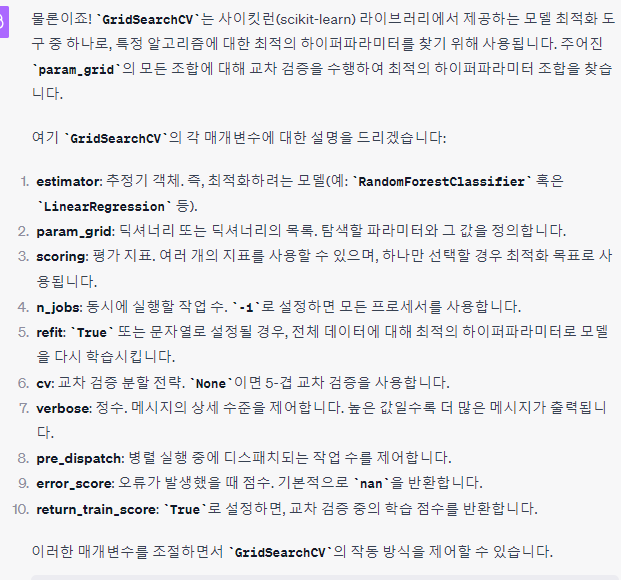

In [28]:
grid_tree

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [50, 70, 90, 110, 130, 150]})

In [29]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [50, 70, 90, 110, 130, 150]})

In [30]:
print('최고의 파라미터:' , grid_tree.best_params_)
print('최고 점수', grid_tree.best_score_)

최고의 파라미터: {'max_depth': 8, 'max_features': 0.4, 'n_estimators': 70}
최고 점수 0.8372669637813068


In [39]:
# 자세하게 찾아보기
params2 = {
    'n_estimators':[65,67,69,70,71,73,75],
    'max_depth': [7,8,9,10],
    'max_features': [0.3, 0.4, 0.5, 0.6]
}
grid_tree1 = GridSearchCV(dtc, params2, cv=5)
grid_tree1

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': [0.3, 0.4, 0.5, 0.6],
                         'n_estimators': [65, 67, 69, 70, 71, 73, 75]})

In [42]:
grid_tree1.fit(X_train, y_train)
print(grid_tree1.best_params_)
print(grid_tree1.best_score_)

{'max_depth': 9, 'max_features': 0.5, 'n_estimators': 69}
0.8338961772644529


In [44]:
forest_model1 =RandomForestClassifier(max_depth=9 , max_features= 0.5 , n_estimators = 69)
forest_model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=0.5, n_estimators=69)

In [49]:
pred1 = forest_model1.predict(X_test)
pred1
sub = pd.read_csv('data/titanic/gender_submission.csv')
sub['Survived'] =pred1
sub.to_csv("kgm_submission04.csv", index = False)